<a href="https://colab.research.google.com/github/ragilhadi/machine-learning/blob/master/YOLO-OBJECT-DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

Clone repo, install dependencies and check PyTorch and GPU.

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt  # install dependencies

import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.8.1+cu101 (Tesla T4)


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
!ls

data	    hubconf.py	README.md	  train.py	  weights
detect.py   LICENSE	requirements.txt  tutorial.ipynb
Dockerfile  models	test.py		  utils


In [10]:
!unzip -q ../drive/MyDrive/PKL-DATASET/datasets.zip -d ../

# 1. Train

Download [COCO128](https://www.kaggle.com/ultralytics/coco128), a small 128-image tutorial dataset, start tensorboard and train YOLOv5s from a pretrained checkpoint for 3 epochs (note actual training is typically much longer, around **300-1000 epochs**, depending on your dataset).

In [12]:
# Train YOLOv5s on COCO128 for 3 epochs
!python train.py --img 640 --batch 3 --epochs 200 --data custom.yaml --weights yolov5s.pt --nosave --cache

github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v5.0-76-g57b0d3a torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Namespace(adam=False, artifact_alias='latest', batch_size=3, bbox_interval=-1, bucket='', cache_images=True, cfg='', data='./data/custom.yaml', device='', entity=None, epochs=200, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='exp', noautoanchor=False, nosave=True, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/exp2', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=3, upload_dataset=False, weights='yolov5s.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
2021-05-10 06:17:31.473554: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynam

# 2. Test

`detect.py` runs YOLOv5 inference on a variety of sources, downloading models automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases), and saving results to `runs/detect`. Example inference sources are:

<img src="https://user-images.githubusercontent.com/26833433/114307955-5c7e4e80-9ae2-11eb-9f50-a90e39bee53f.png" width="900"> 

In [27]:
!python detect.py --weights runs/train/exp2/weights/last.pt --img 640 --conf 0.25 --source ../drive/MyDrive/PKL-DATASET/test.jpg

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, hide_conf=False, hide_labels=False, img_size=640, iou_thres=0.45, line_thickness=3, name='exp', nosave=False, project='runs/detect', save_conf=False, save_crop=False, save_txt=False, source='../drive/MyDrive/PKL-DATASET/test.jpg', update=False, view_img=False, weights=['runs/train/exp2/weights/last.pt'])
YOLOv5 🚀 v5.0-76-g57b0d3a torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 224 layers, 7053910 parameters, 0 gradients, 16.3 GFLOPS
image 1/1 /content/yolov5/../drive/MyDrive/PKL-DATASET/test.jpg: 480x640 1 papan, Done. (0.012s)
Results saved to runs/detect/exp
Done. (0.378s)


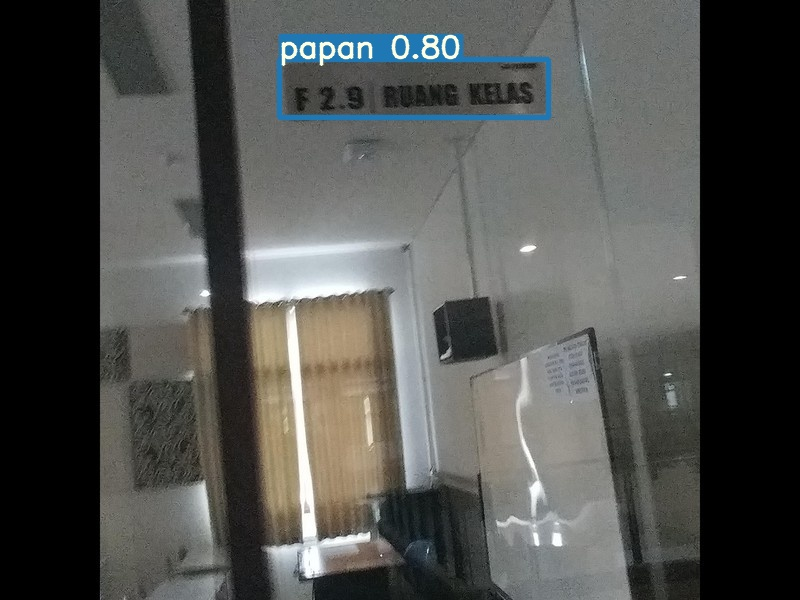

In [28]:
Image(filename='runs/detect/exp/test.jpg', width=600)

# 3. Visualize

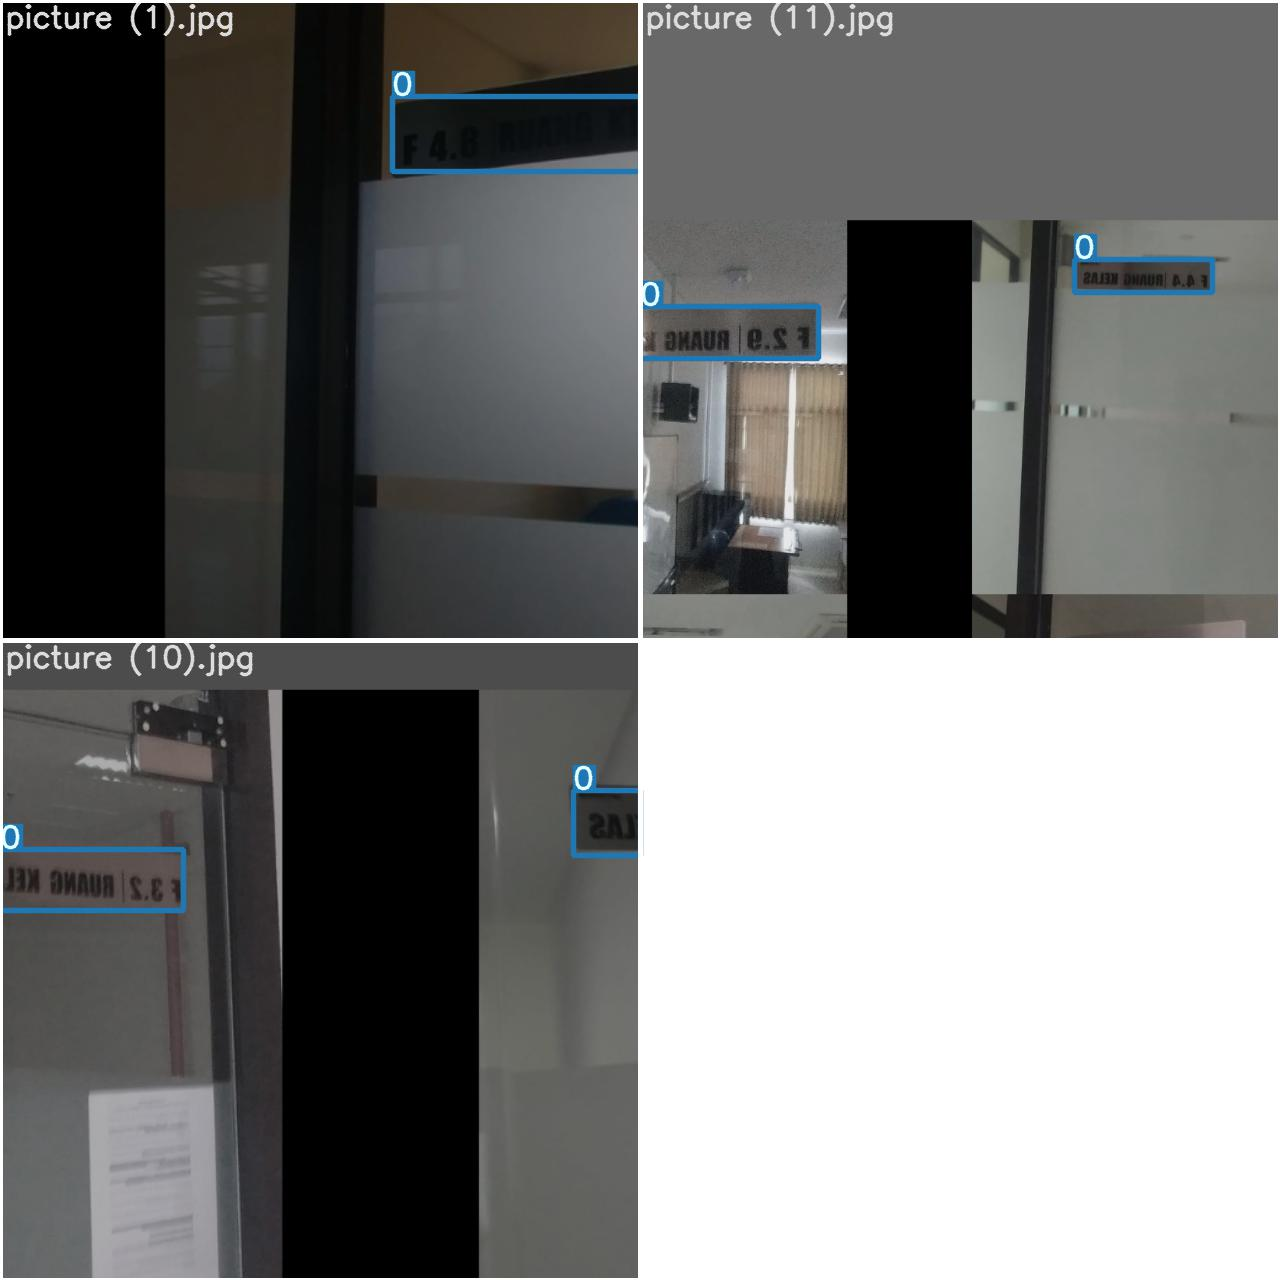

In [13]:
Image(filename='runs/train/exp2/train_batch0.jpg', width=800) 

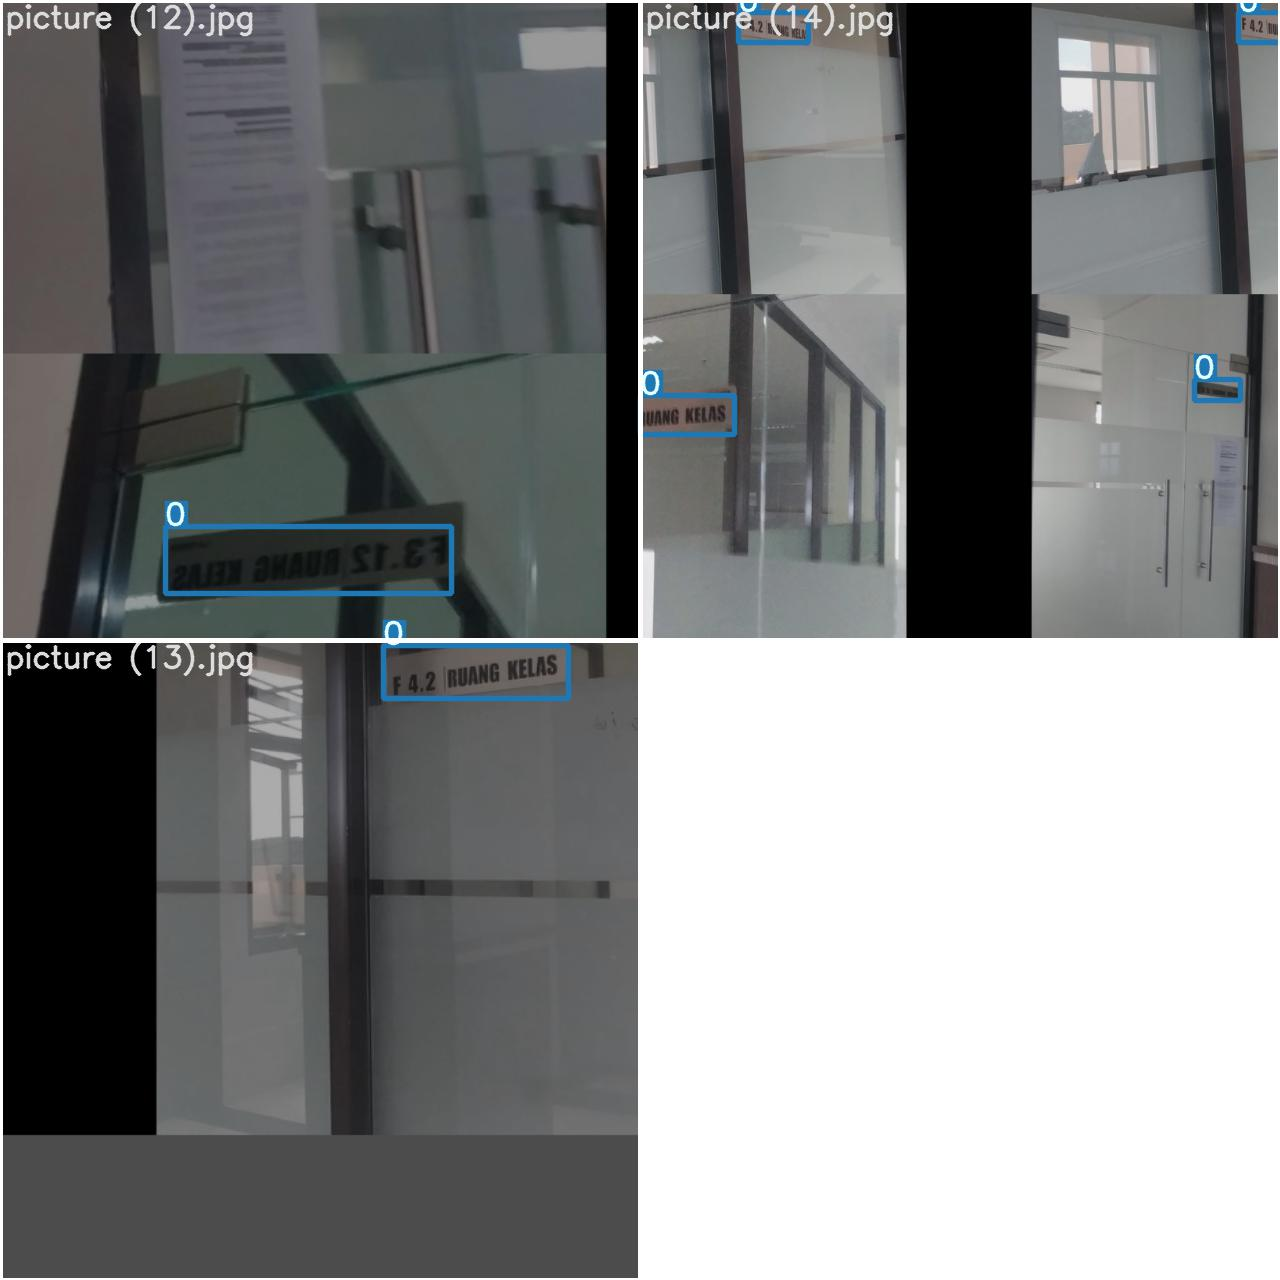

In [14]:
Image(filename='runs/train/exp2/train_batch1.jpg', width=800)

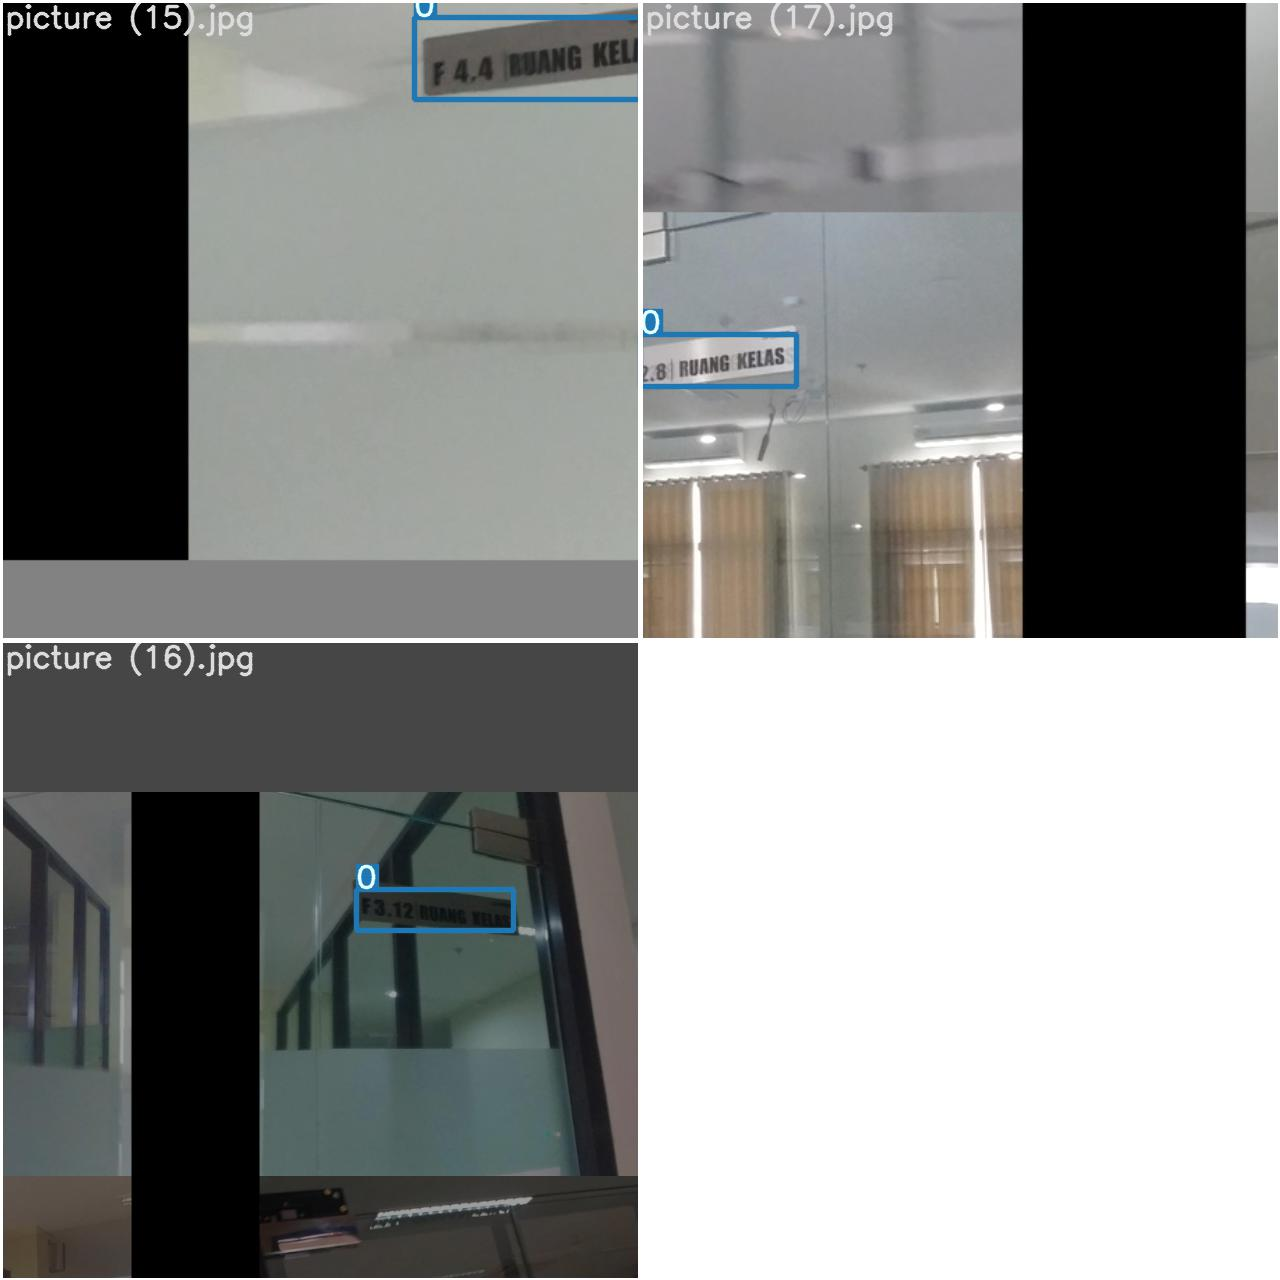

In [15]:
Image(filename='runs/train/exp2/train_batch2.jpg', width=800) # train batch 0 mosaics and labels

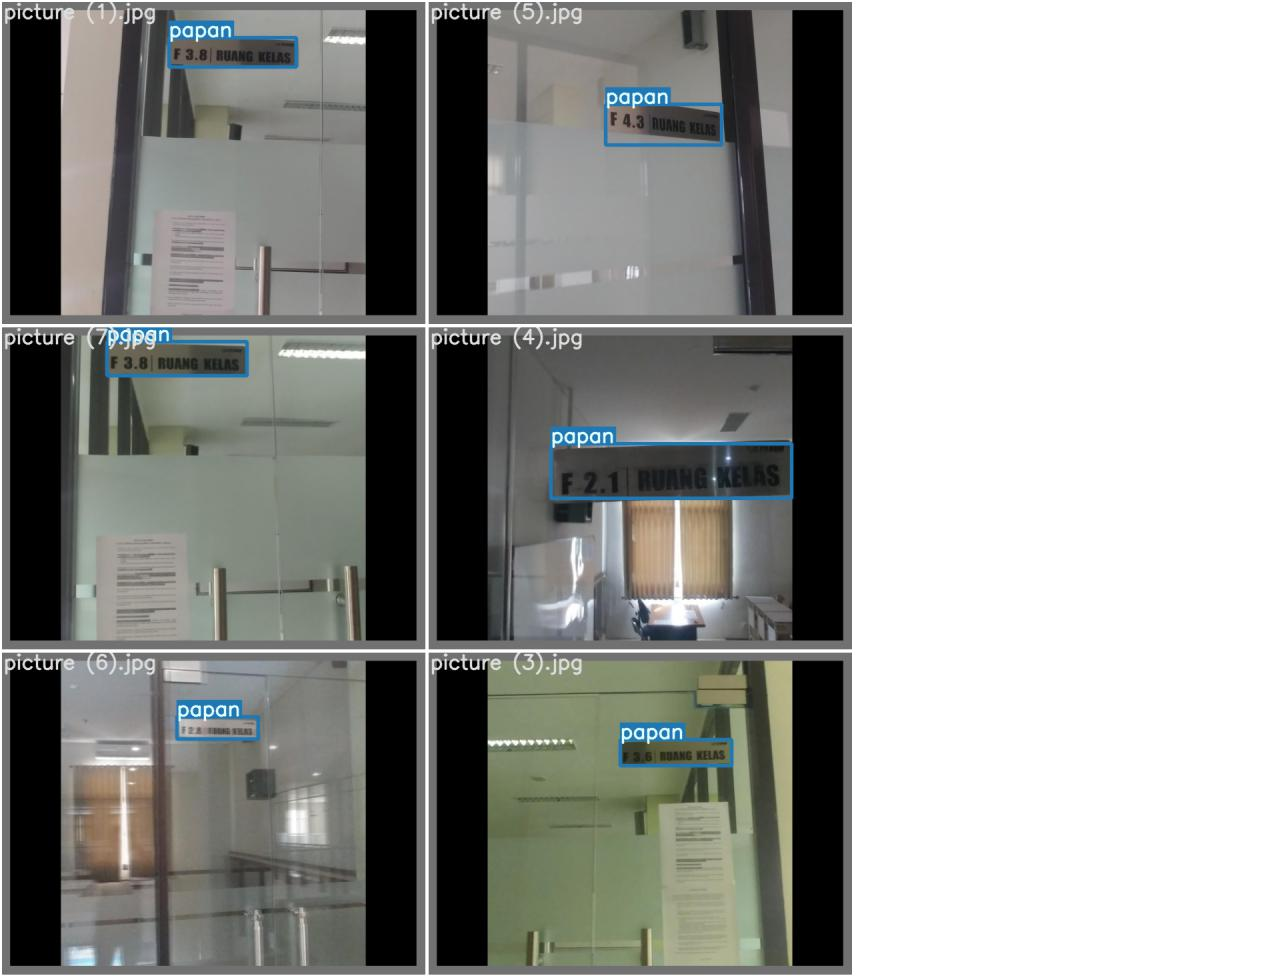

In [16]:
Image(filename='runs/train/exp2/test_batch0_labels.jpg', width=800)  # test batch 0 labels

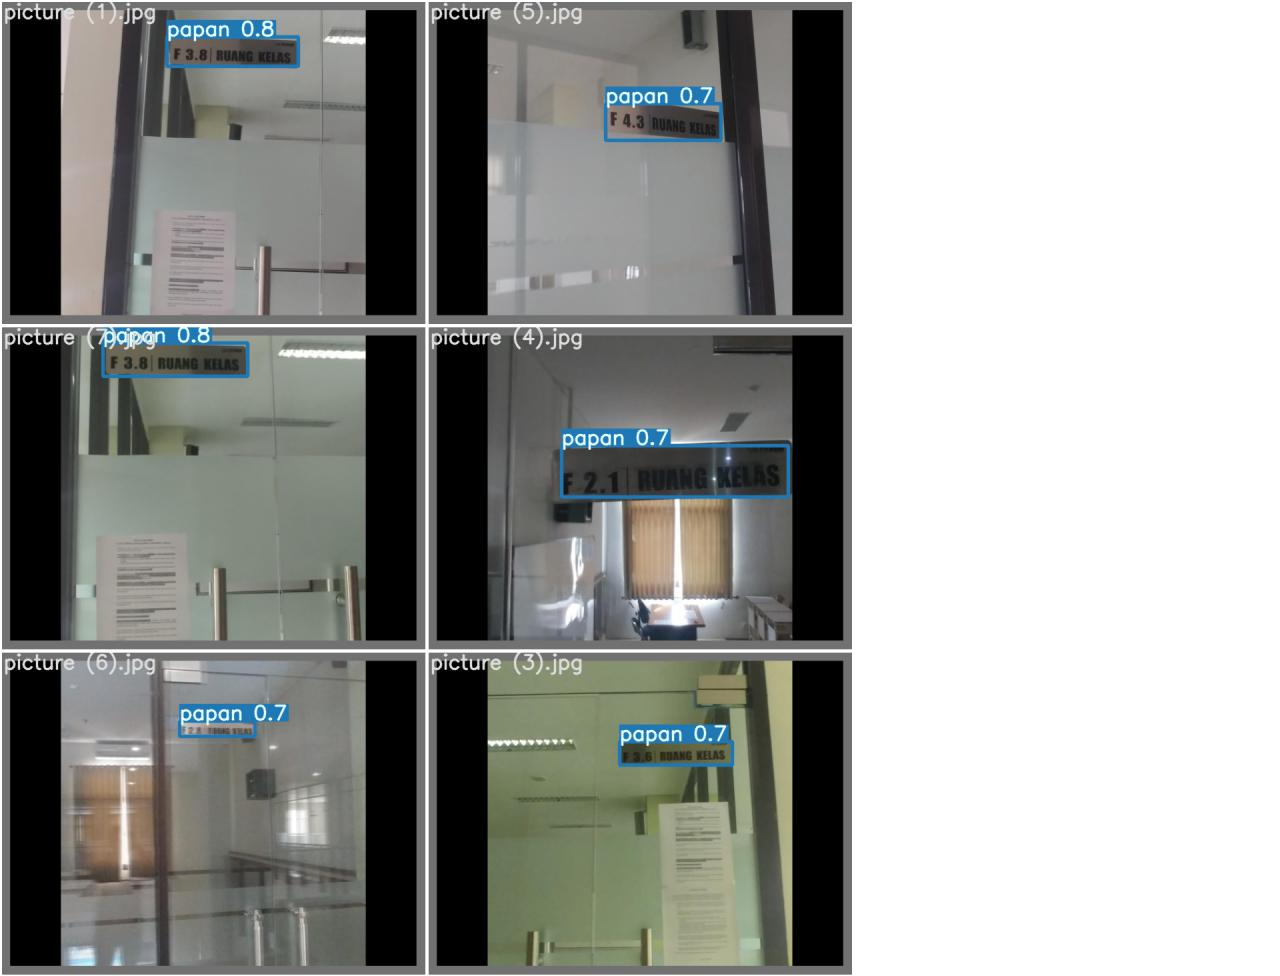

In [17]:
Image(filename='runs/train/exp2/test_batch0_pred.jpg', width=800)  # test batch 0 predictions

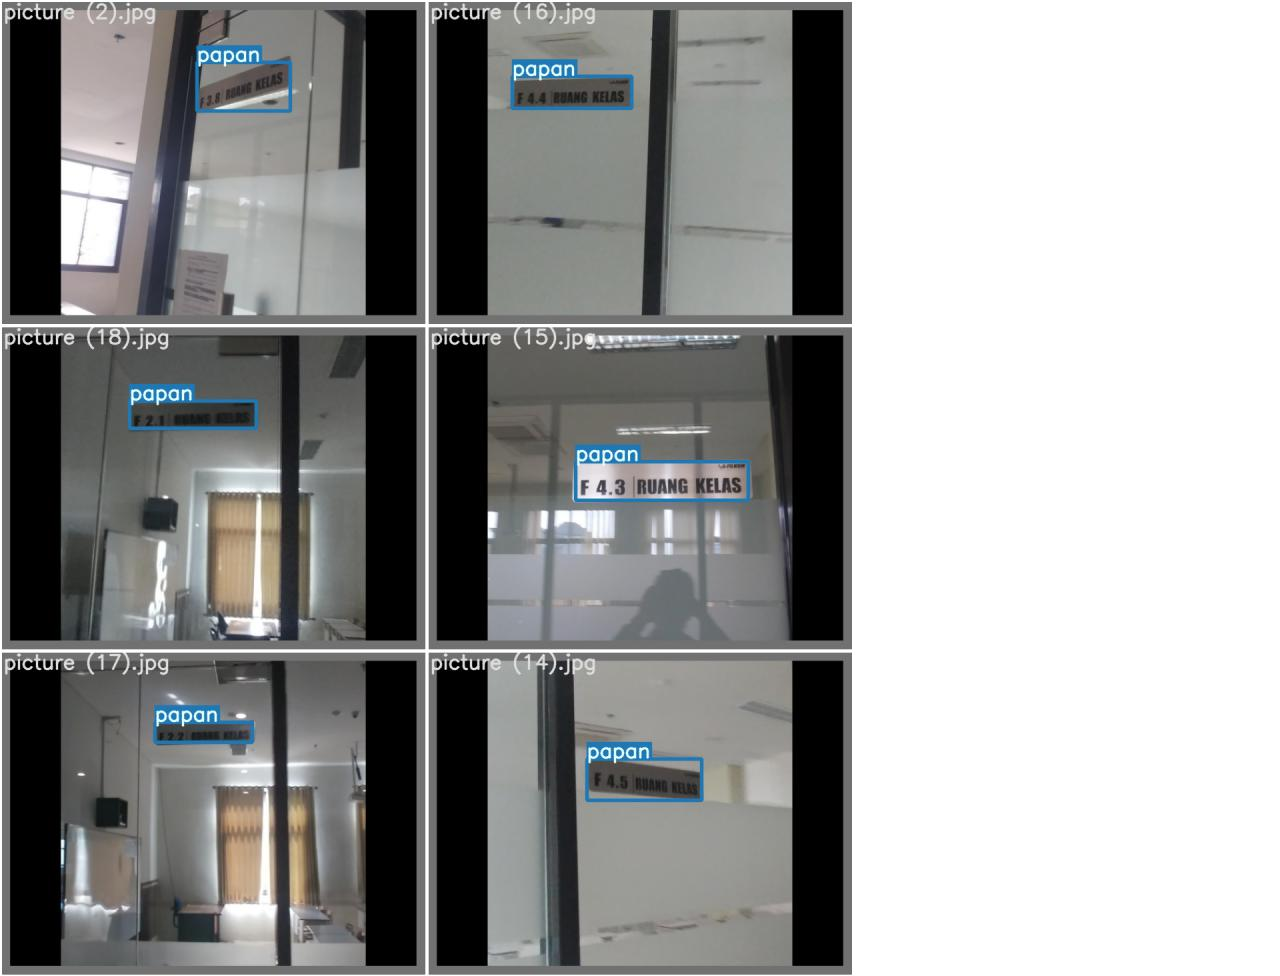

In [18]:
Image(filename='runs/train/exp2/test_batch1_labels.jpg', width=800)  # test batch 0 labels

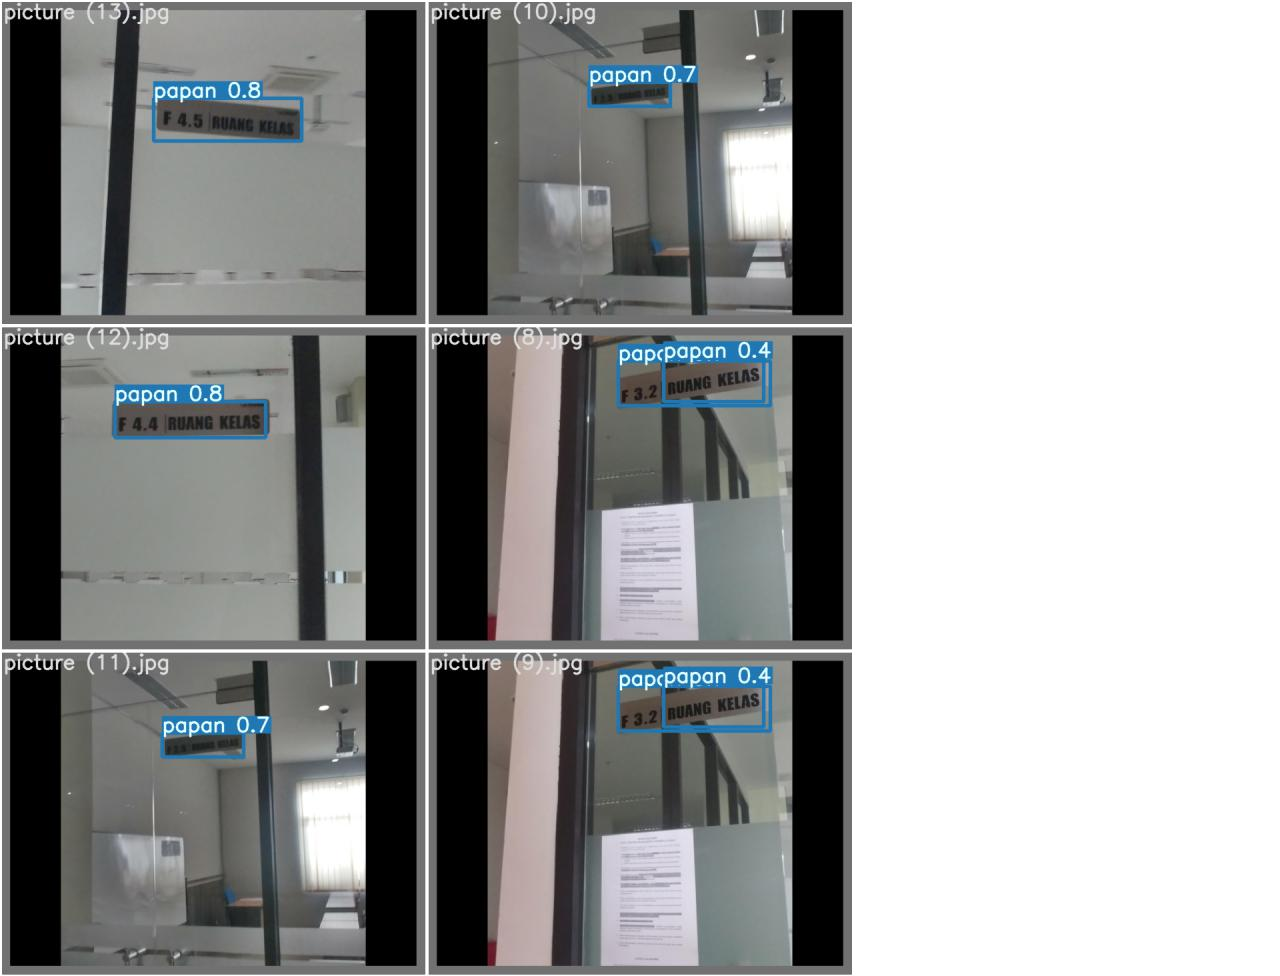

In [19]:
Image(filename='runs/train/exp2/test_batch2_pred.jpg', width=800)  # test batch 0 predictions

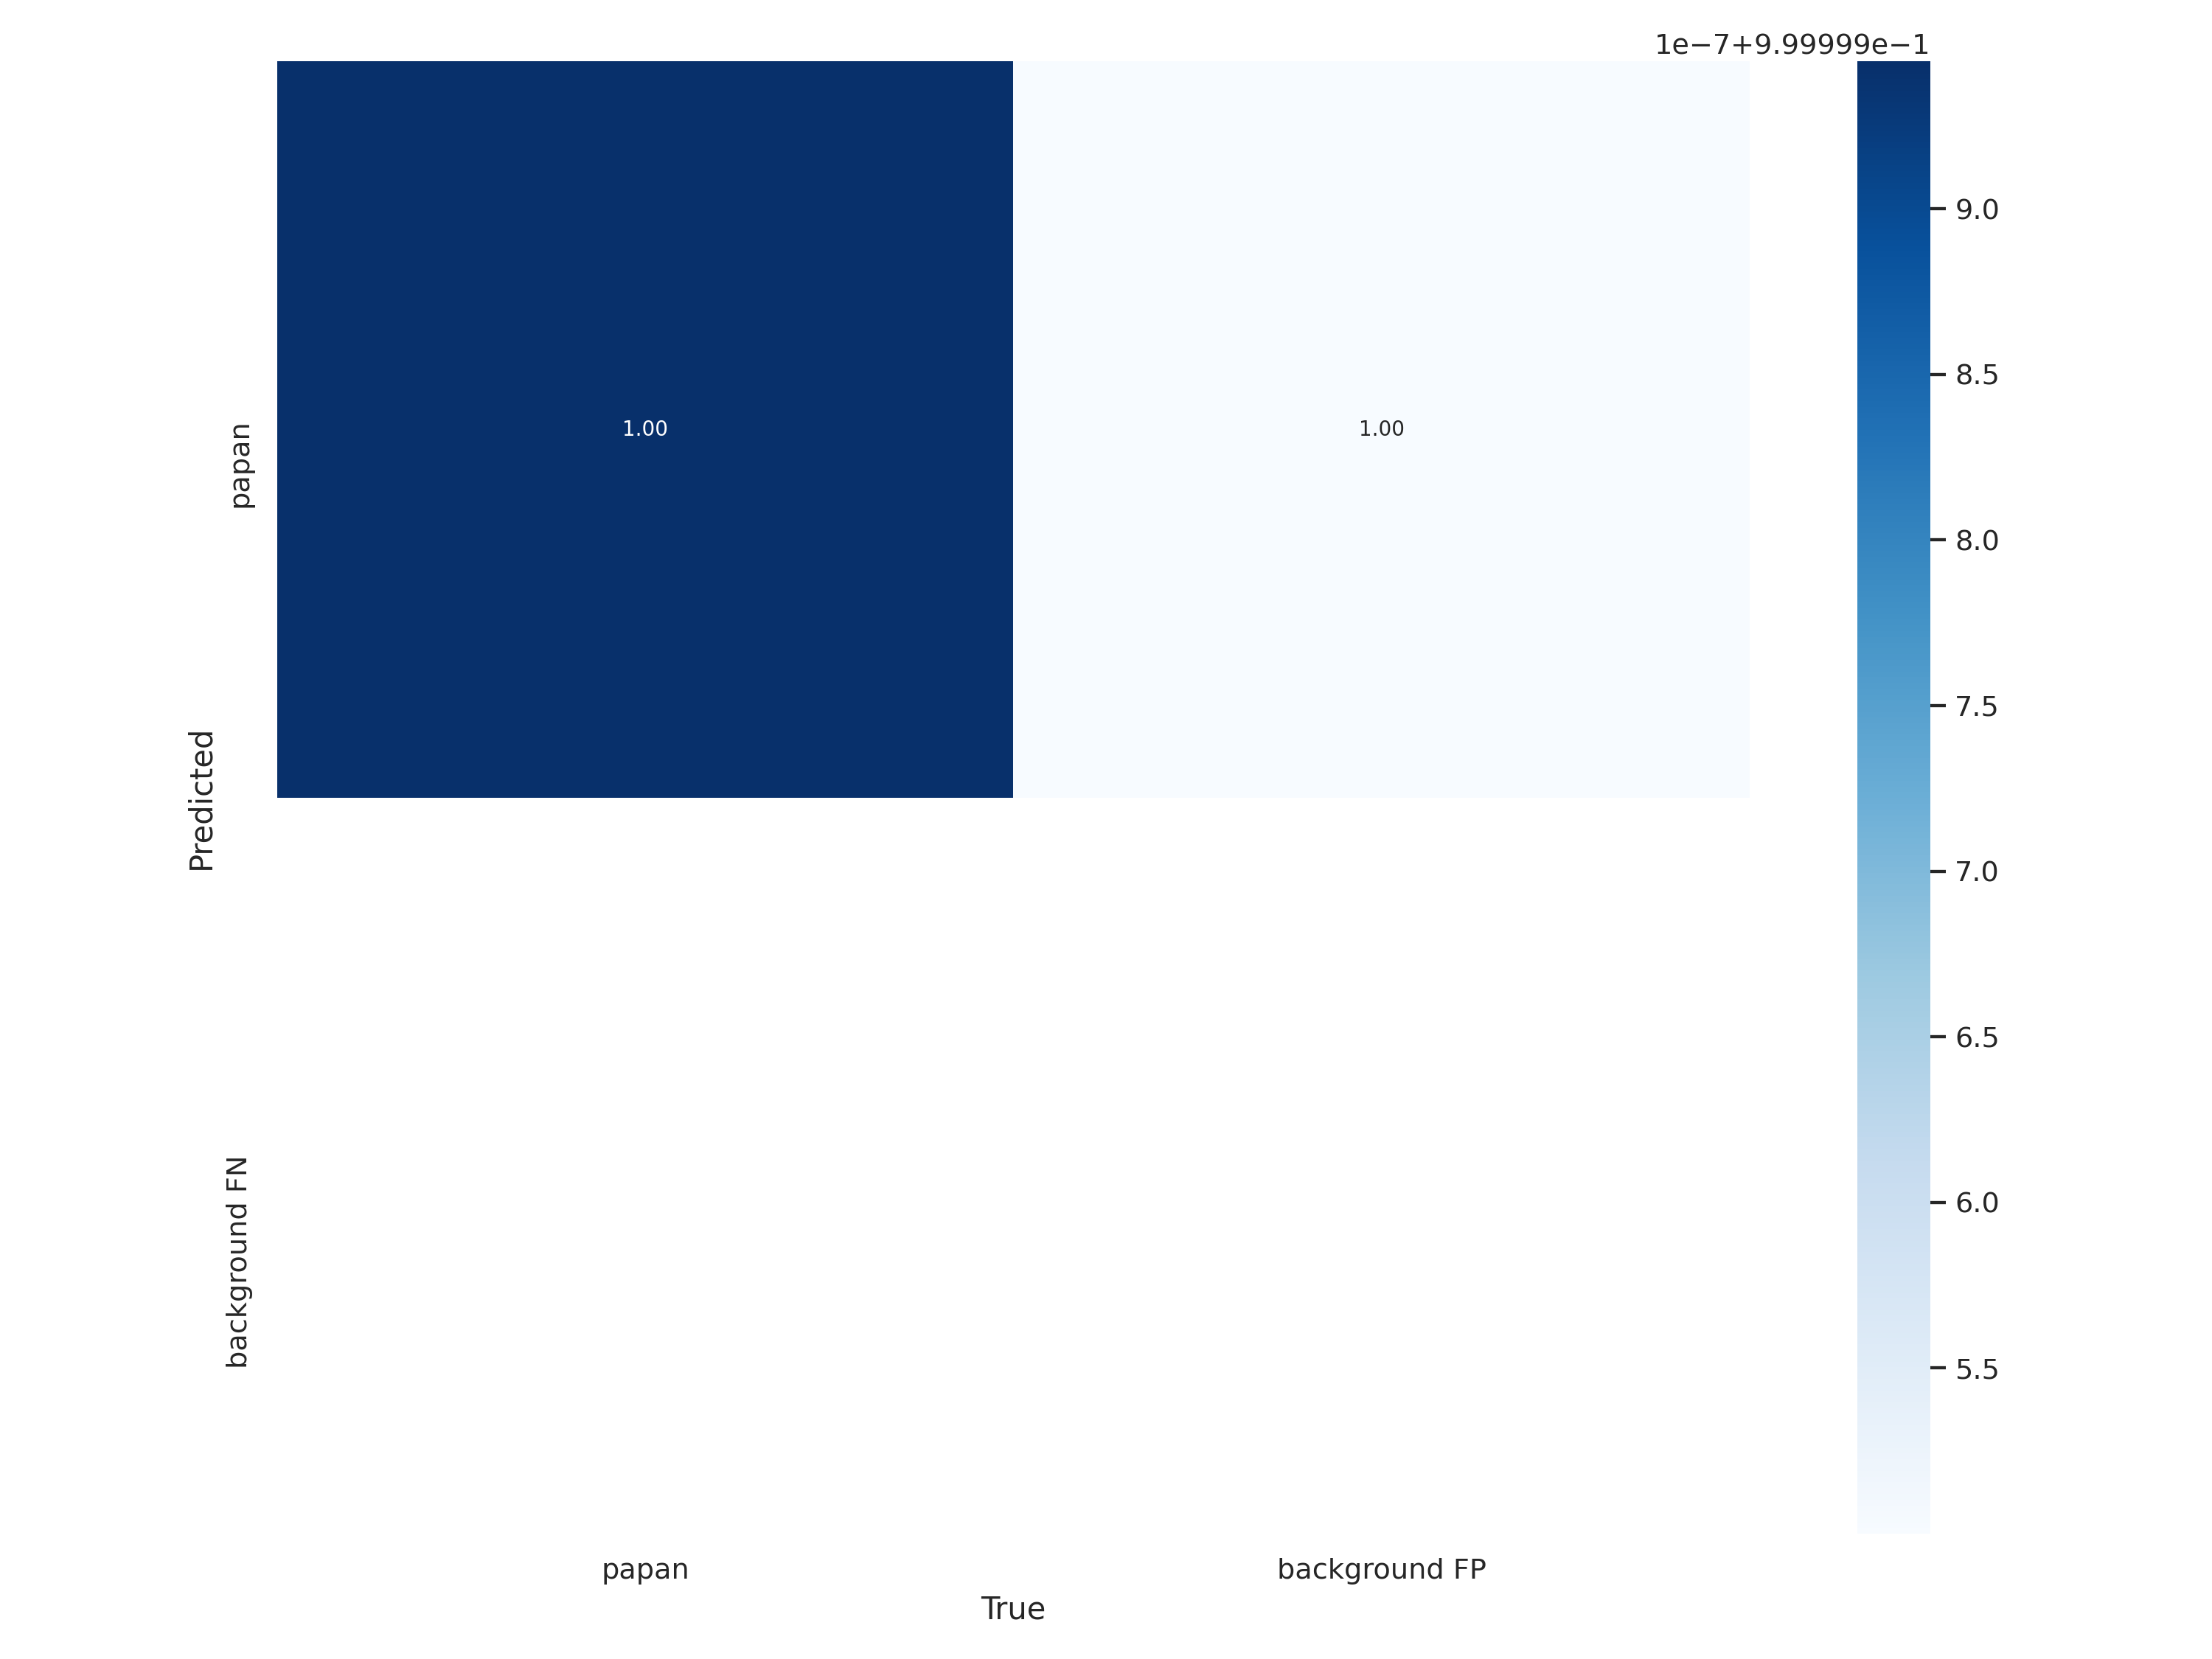

In [20]:
Image(filename='runs/train/exp2/confusion_matrix.png', width=800)  # test batch 0 labels

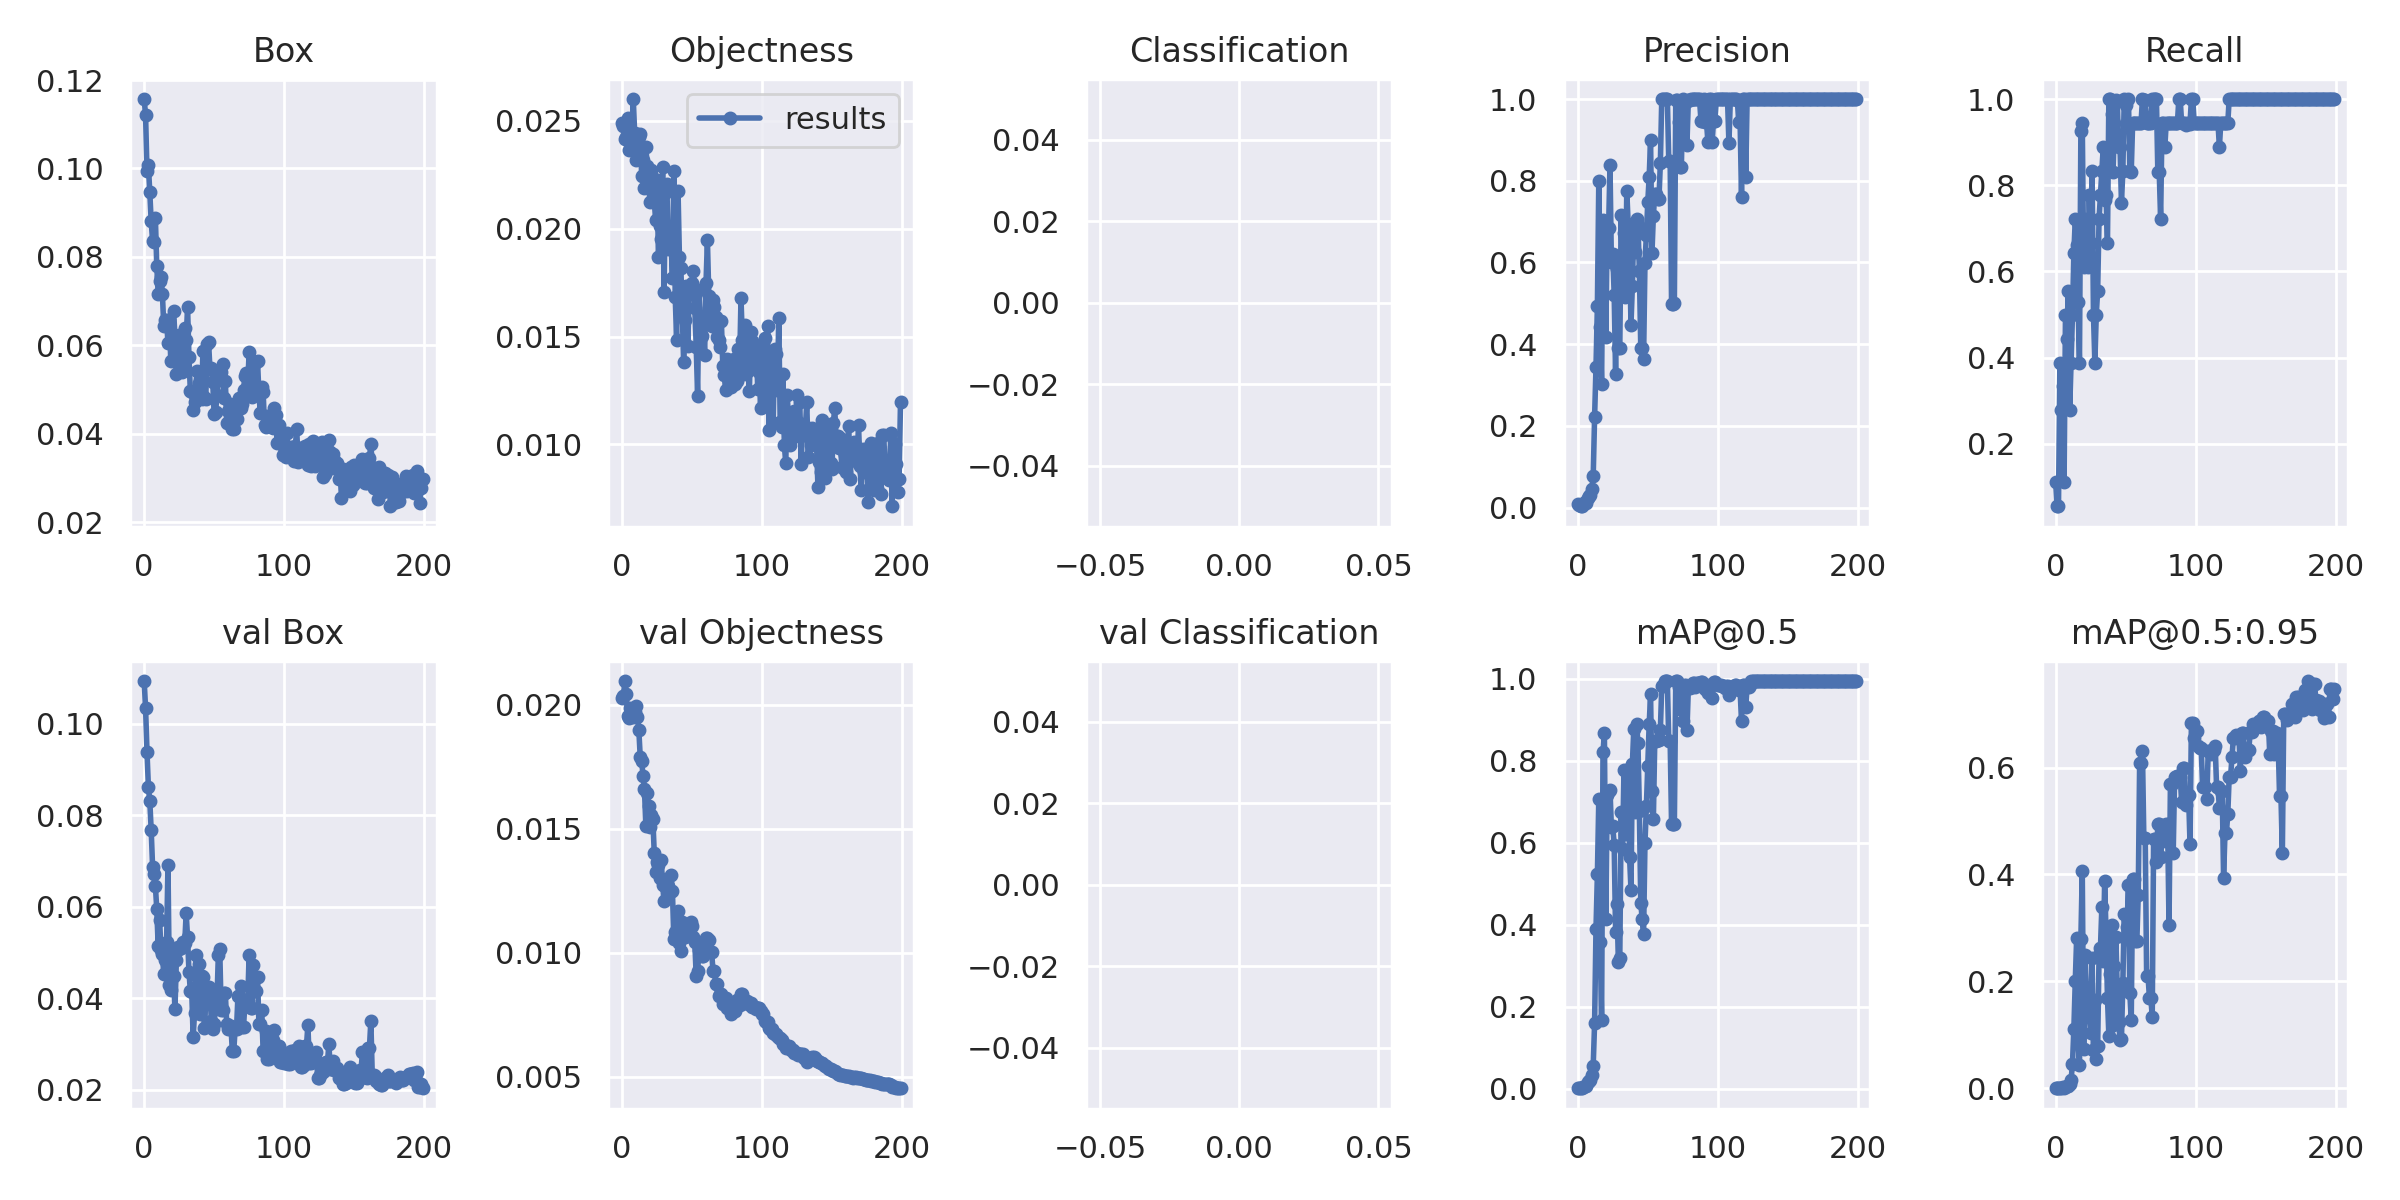

In [21]:
Image(filename='runs/train/exp2/results.png', width=800)  # test batch 0 predictions

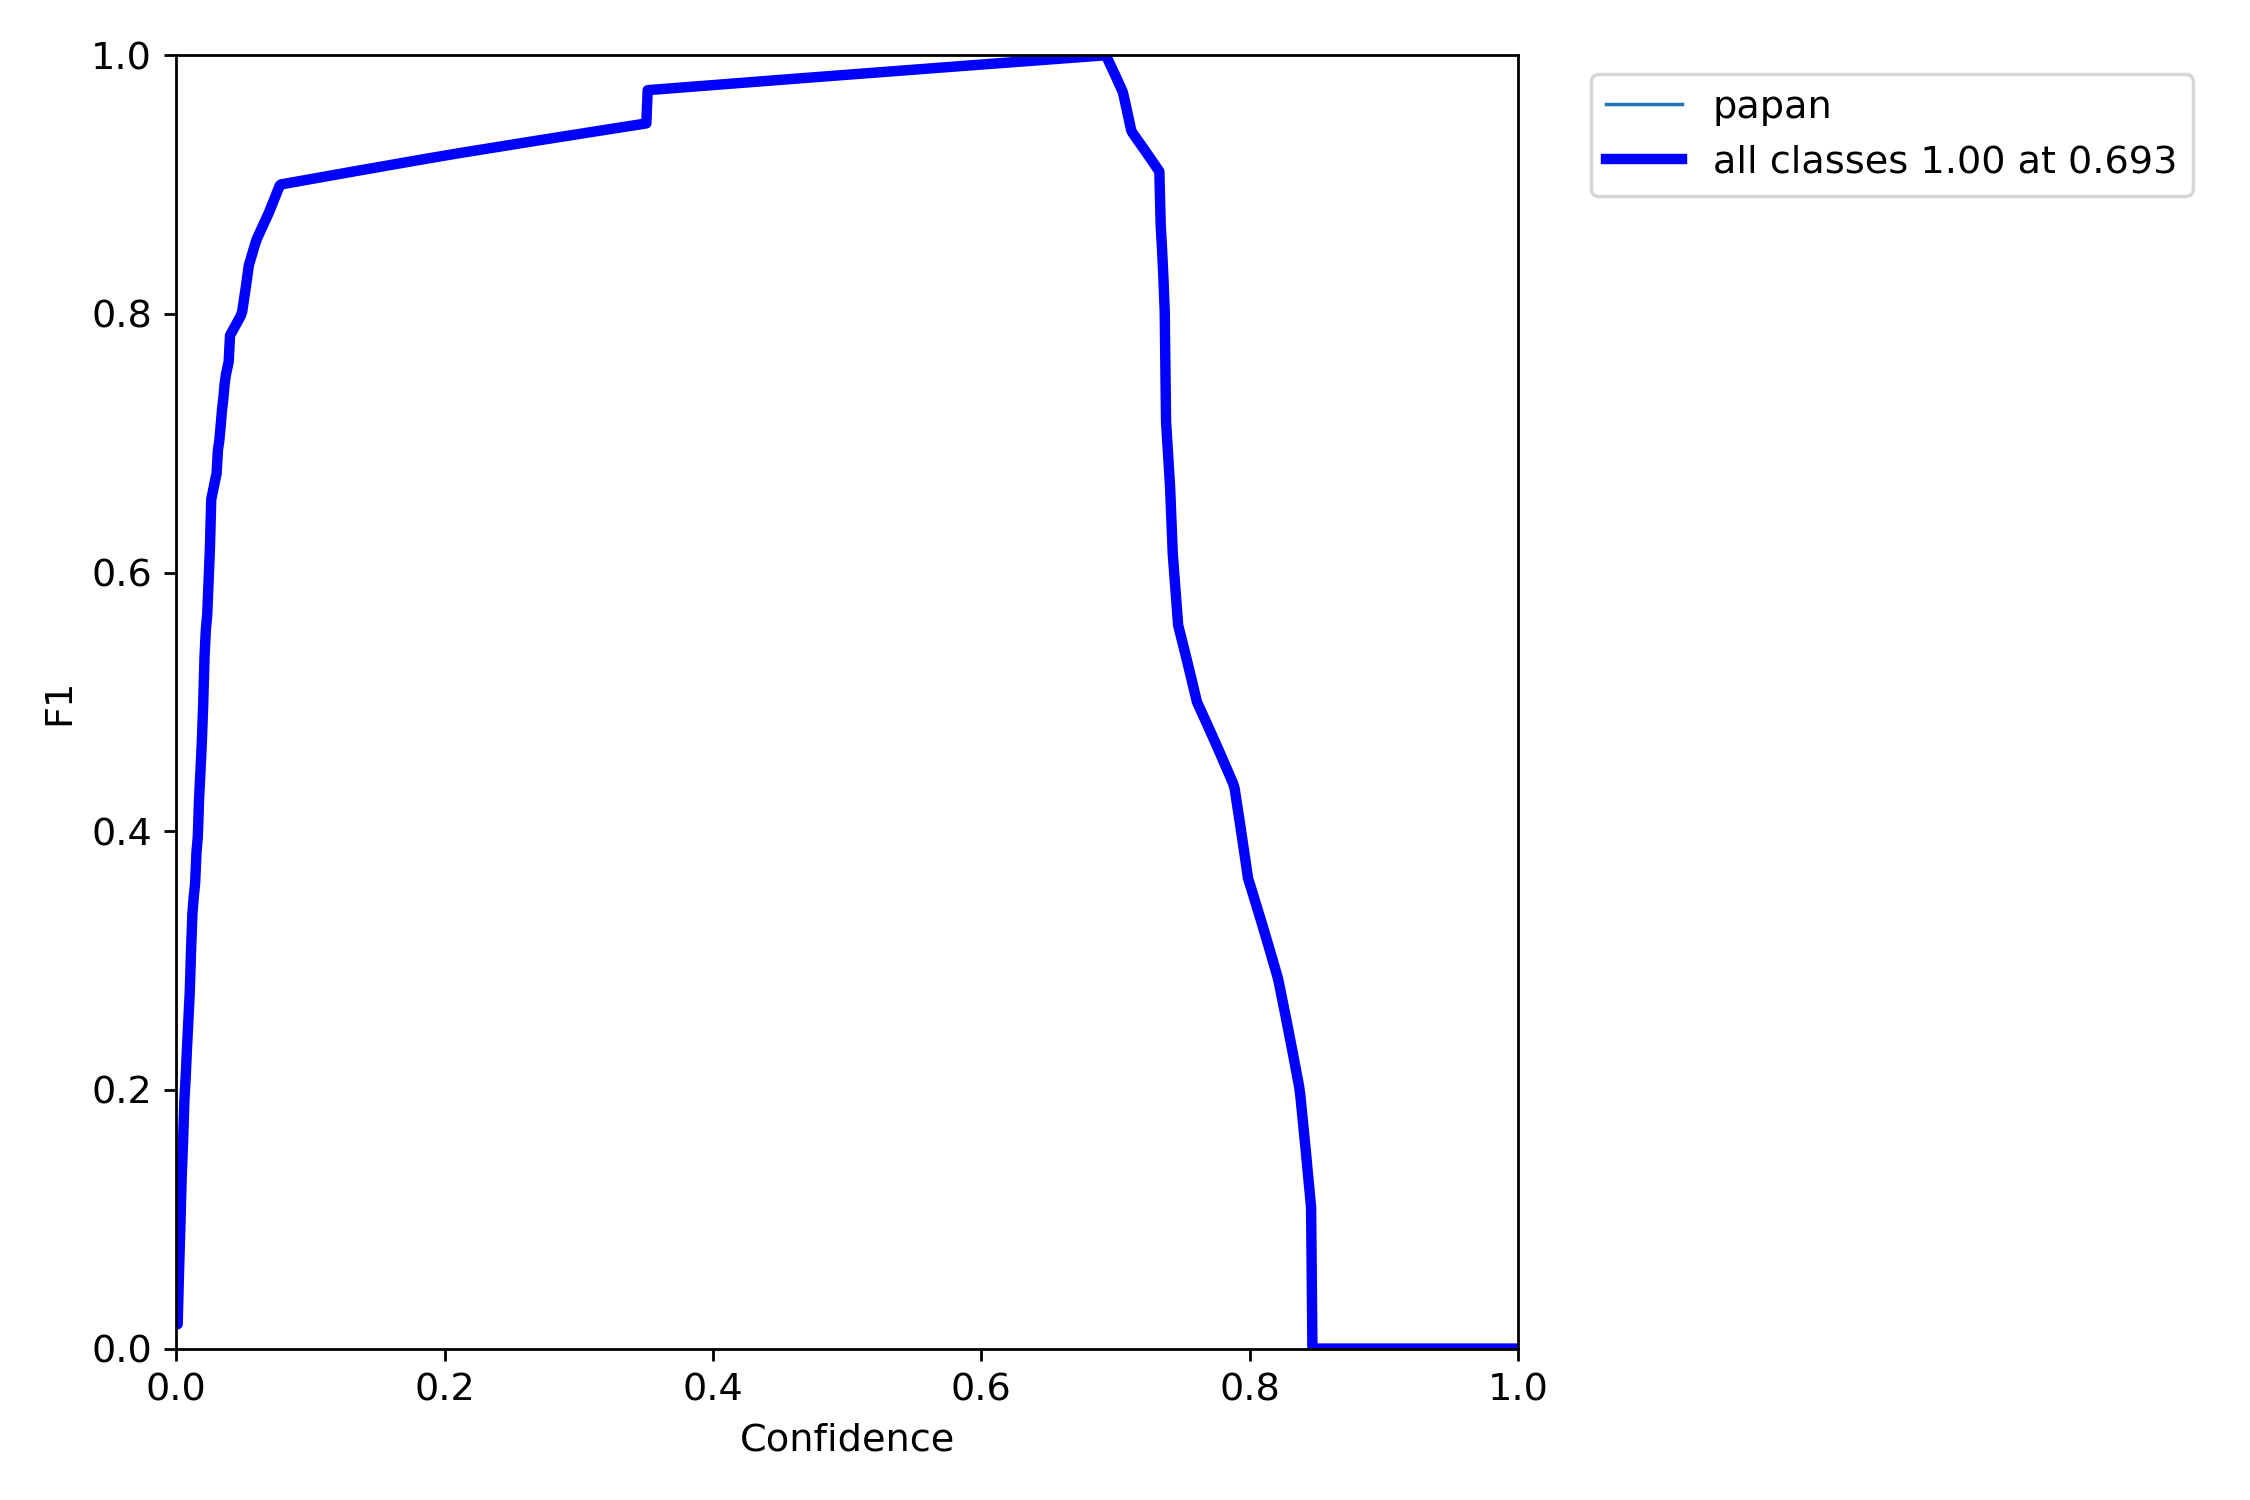

In [22]:
Image(filename='runs/train/exp2/F1_curve.png', width=800)  # test batch 0 predictions

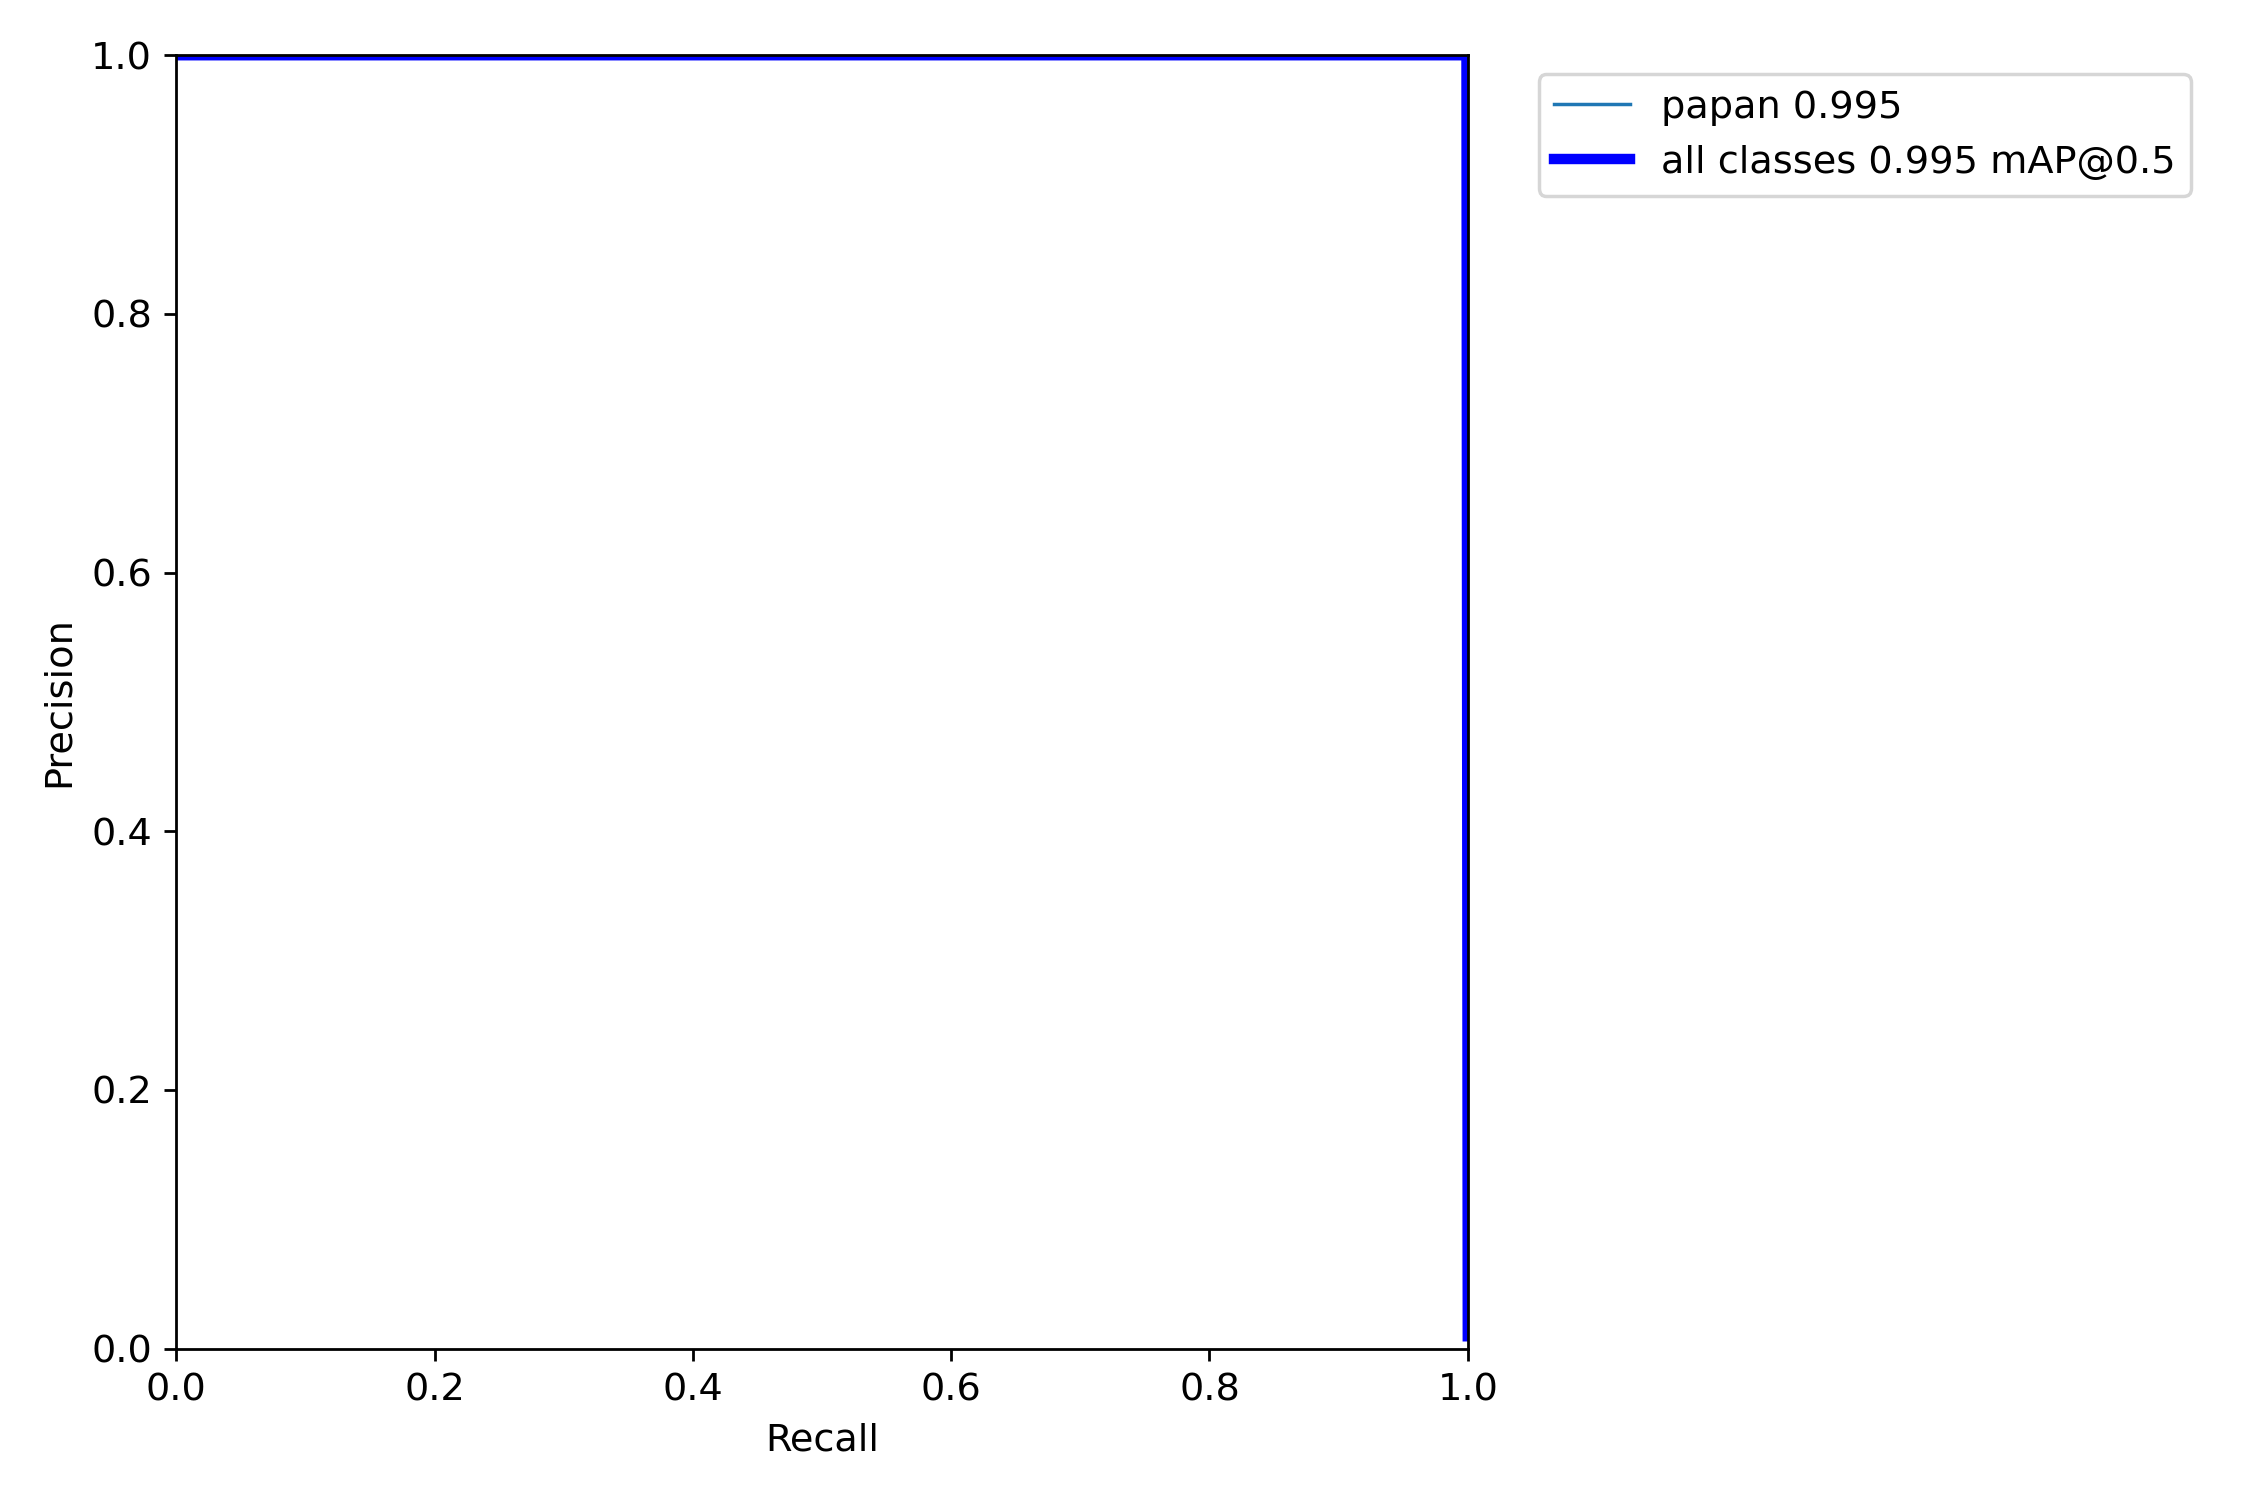

In [23]:
Image(filename='runs/train/exp2/PR_curve.png', width=800)  # test batch 0 predictions

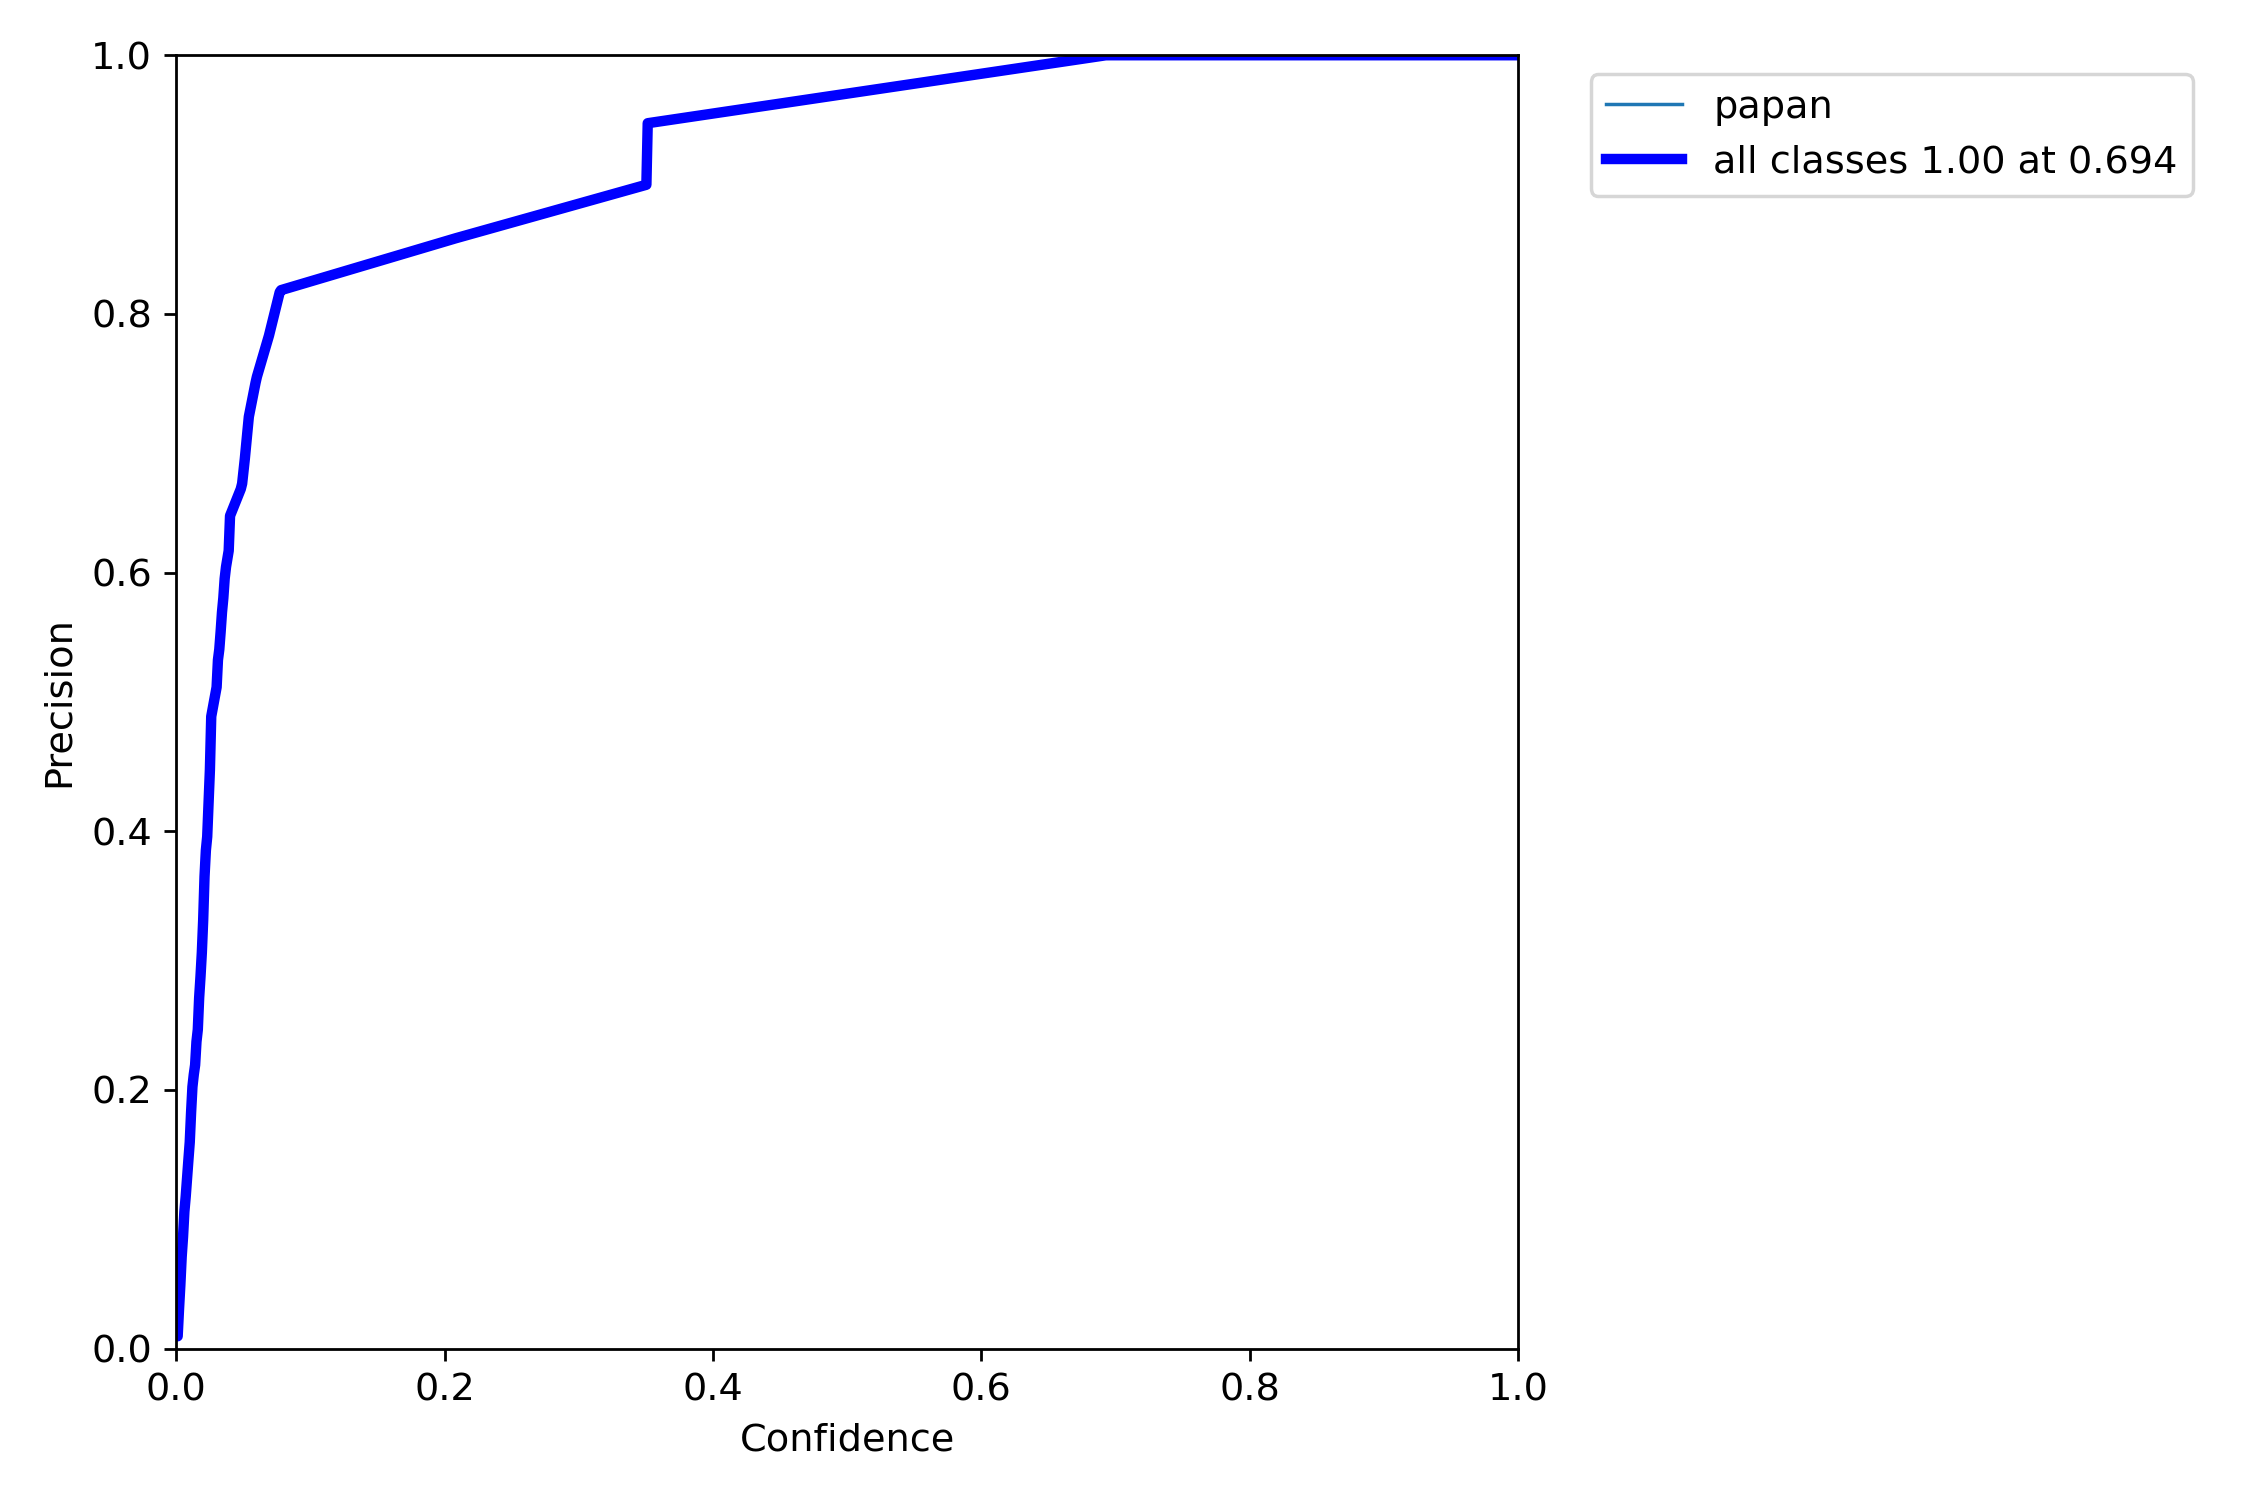

In [24]:
Image(filename='runs/train/exp2/P_curve.png', width=800)  # test batch 0 predictions

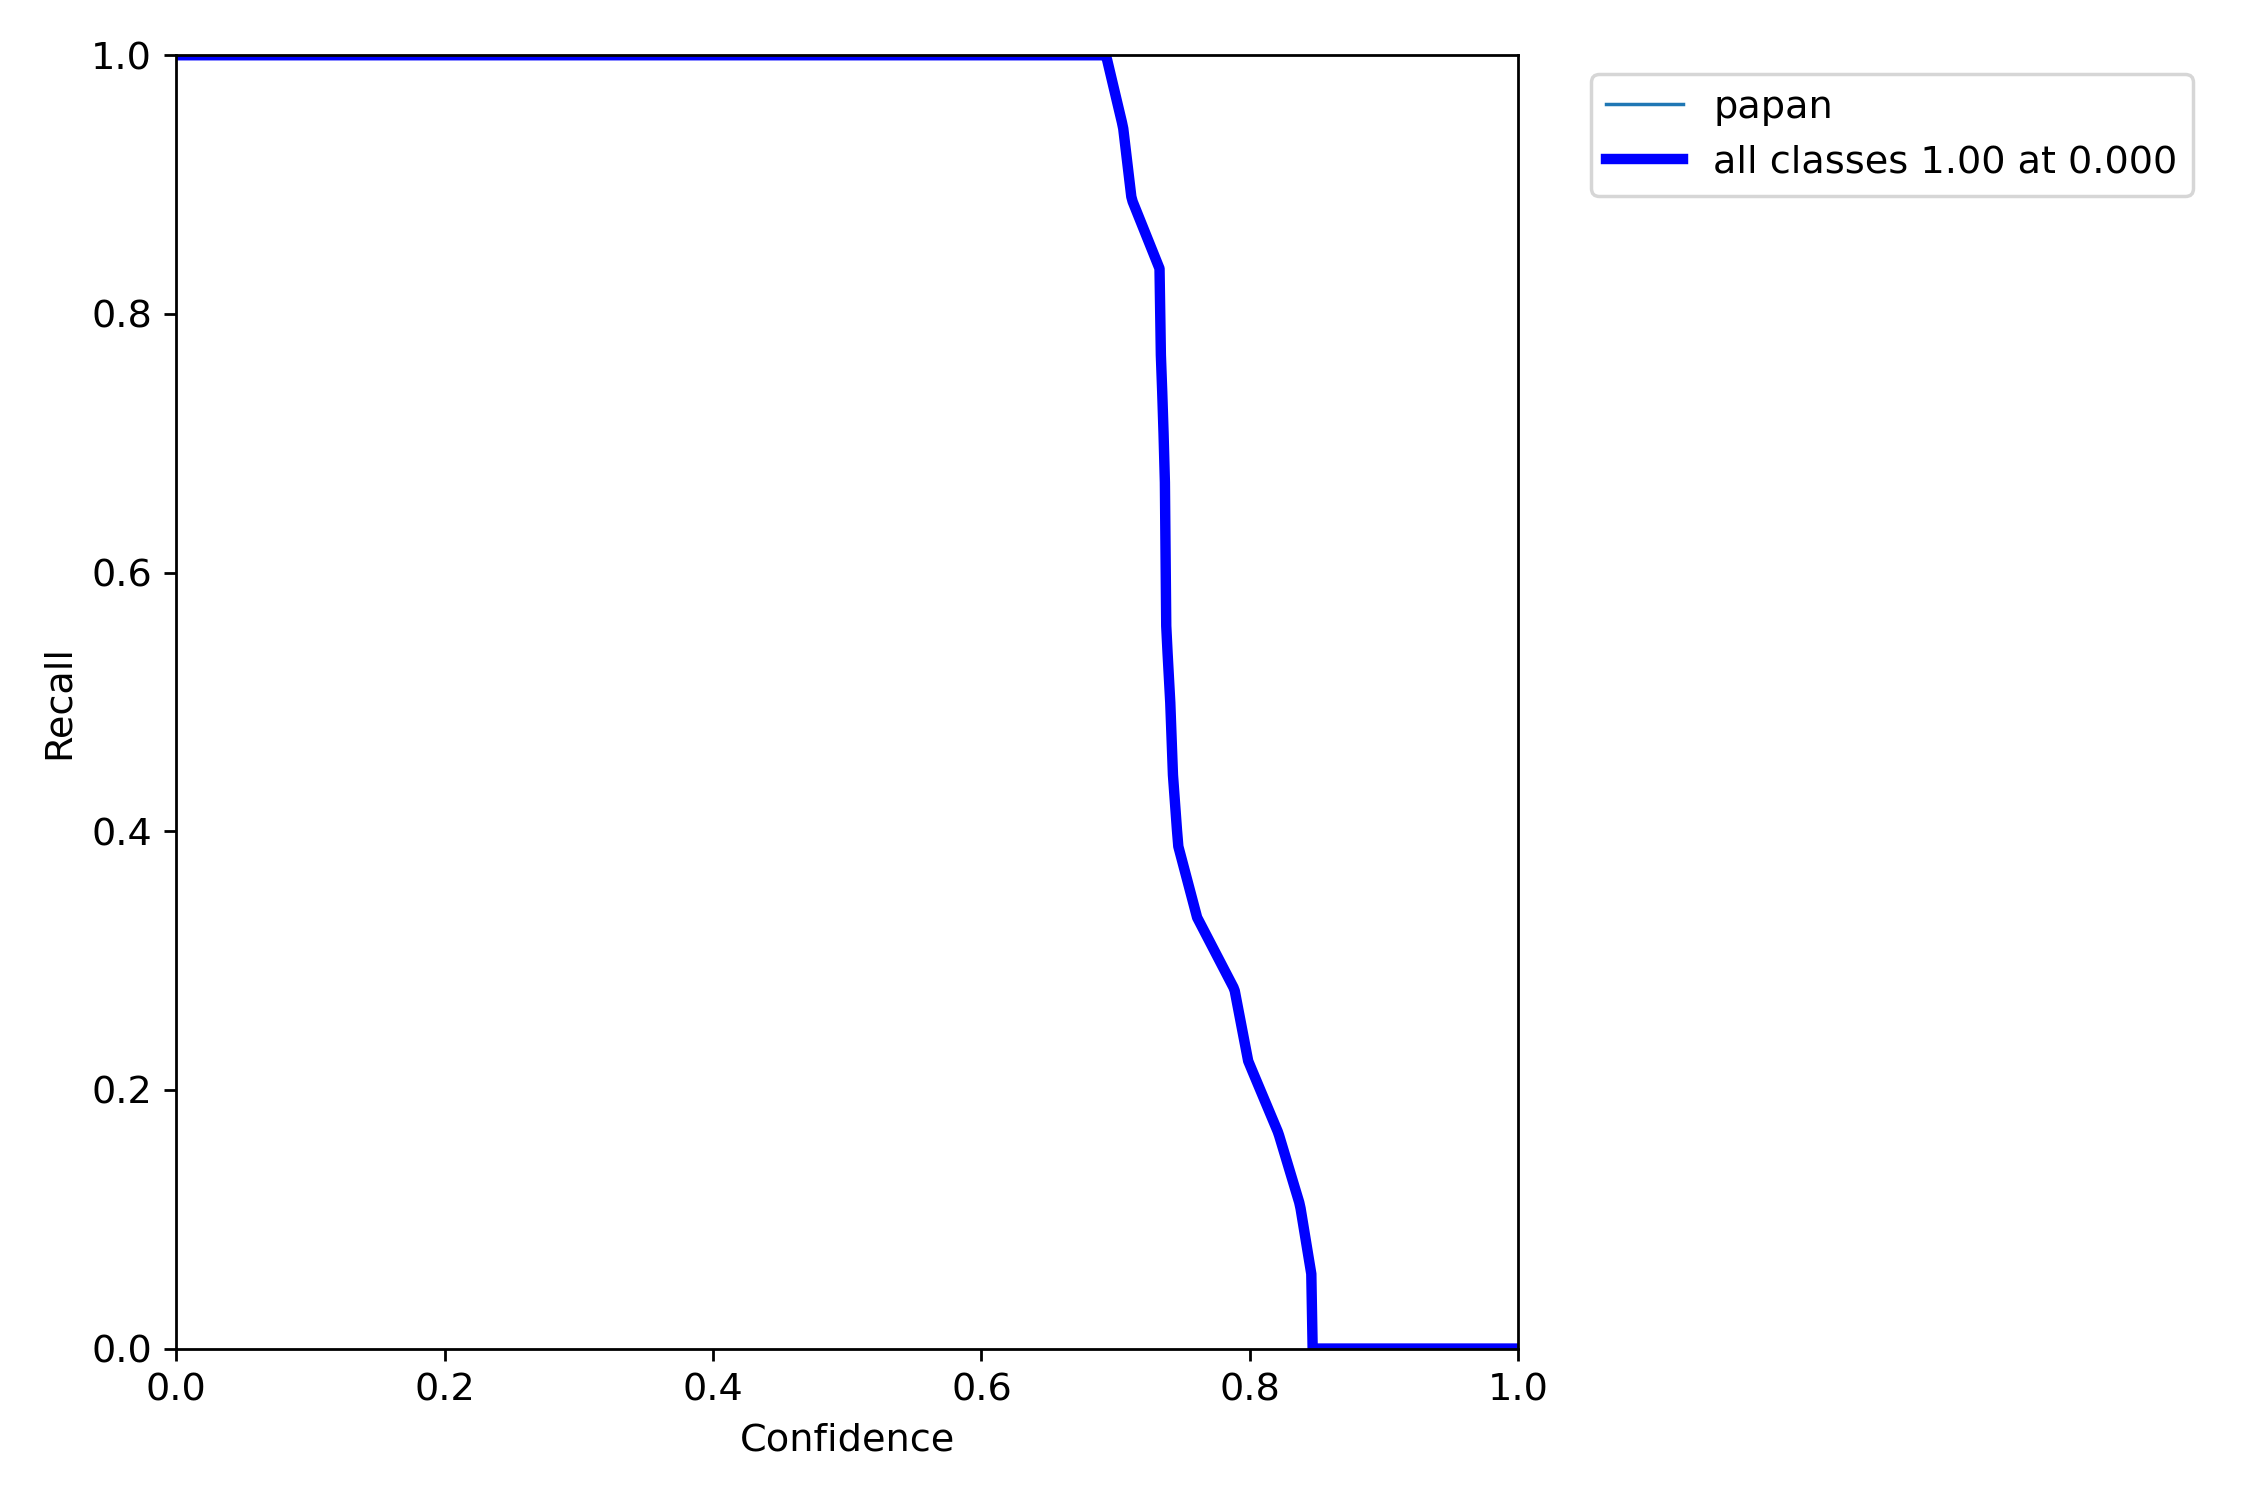

In [25]:
Image(filename='runs/train/exp2/R_curve.png', width=800)  # test batch 0 predictions

# Environments

YOLOv5 may be run in any of the following up-to-date verified environments (with all dependencies including [CUDA](https://developer.nvidia.com/cuda)/[CUDNN](https://developer.nvidia.com/cudnn), [Python](https://www.python.org/) and [PyTorch](https://pytorch.org/) preinstalled):

- **Google Colab and Kaggle** notebooks with free GPU: <a href="https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a> <a href="https://www.kaggle.com/ultralytics/yolov5"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open In Kaggle"></a>
- **Google Cloud** Deep Learning VM. See [GCP Quickstart Guide](https://github.com/ultralytics/yolov5/wiki/GCP-Quickstart)
- **Amazon** Deep Learning AMI. See [AWS Quickstart Guide](https://github.com/ultralytics/yolov5/wiki/AWS-Quickstart)
- **Docker Image**. See [Docker Quickstart Guide](https://github.com/ultralytics/yolov5/wiki/Docker-Quickstart) <a href="https://hub.docker.com/r/ultralytics/yolov5"><img src="https://img.shields.io/docker/pulls/ultralytics/yolov5?logo=docker" alt="Docker Pulls"></a>


# Status

![CI CPU testing](https://github.com/ultralytics/yolov5/workflows/CI%20CPU%20testing/badge.svg)

If this badge is green, all [YOLOv5 GitHub Actions](https://github.com/ultralytics/yolov5/actions) Continuous Integration (CI) tests are currently passing. CI tests verify correct operation of YOLOv5 training ([train.py](https://github.com/ultralytics/yolov5/blob/master/train.py)), testing ([test.py](https://github.com/ultralytics/yolov5/blob/master/test.py)), inference ([detect.py](https://github.com/ultralytics/yolov5/blob/master/detect.py)) and export ([export.py](https://github.com/ultralytics/yolov5/blob/master/models/export.py)) on MacOS, Windows, and Ubuntu every 24 hours and on every commit.
